In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
titanic = pd.read_csv("E:/Programming/Booster MDS/titanic/train.csv", sep=",")

In [3]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X = titanic.drop('Survived', 1)
y = titanic['Survived']
print("X", "\n", X.head(5), "\n","Y", "\n", y.head(5))

X 
    PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S   
 Y 
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [6]:
X.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Barkworth, Mr. Algernon Henry Wilson",male,1601,B96 B98,S
freq,1,577,7,4,644


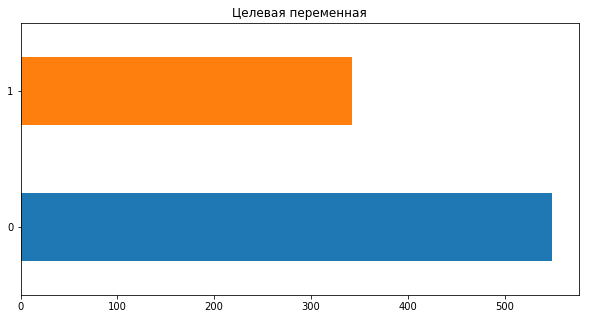

In [7]:
plt.figure(figsize=(10,5))
y.value_counts().plot(kind='barh')
plt.title('Целевая переменная')
plt.show()

In [8]:
print(X.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
X1 = X.drop(['Cabin'], axis=1)
X1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique()
X1['title'] = X1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(X1['title'].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [10]:
for dataset in [X1]:
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
X1['title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: title, dtype: int64

In [11]:
for dataset in [X1]:
    dataset['title'] = dataset['title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).fillna(0)
    
X1.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [12]:
for dataset in [X1]:
    dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0})
X1.drop(['Name'], inplace = True, axis = 1)
X1.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,3,1,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,0,38.0,1,0,PC 17599,71.2833,C,3
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,0,35.0,1,0,113803,53.1000,S,3
4,5,3,1,35.0,0,0,373450,8.0500,S,1


In [13]:
for dataset in [X1]:
    dataset['Age'] =  dataset['Age'].fillna(np.median(dataset['Age'].median()))
X1.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
title          0
dtype: int64

In [14]:
for dataset in [X1]:
    dataset['Embarked'] = dataset['Embarked'].fillna('X')
for dataset in [X1]:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2, 'X': 3})
print(X1['Embarked'].isnull().sum(), X1.head(5))

0    PassengerId  Pclass  Sex   Age  SibSp  Parch            Ticket     Fare  \
0            1       3    1  22.0      1      0         A/5 21171   7.2500   
1            2       1    0  38.0      1      0          PC 17599  71.2833   
2            3       3    0  26.0      0      0  STON/O2. 3101282   7.9250   
3            4       1    0  35.0      1      0            113803  53.1000   
4            5       3    1  35.0      0      0            373450   8.0500   

   Embarked  title  
0         0      1  
1         1      3  
2         0      2  
3         0      3  
4         0      1  


In [15]:
X1.drop(['Ticket'], inplace = True, axis = 1)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(596, 9) (295, 9) (596,) (295,)


In [18]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

pred = reg.predict(X_test)
accuracy_score(y_test, pred)

0.8101694915254237

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.84      0.85      0.84       175
          1       0.77      0.76      0.76       120

avg / total       0.81      0.81      0.81       295



In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.82      0.77      0.79       175
          1       0.69      0.75      0.72       120

avg / total       0.76      0.76      0.76       295



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble, learning_curve


E:\Program Files\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
E:\Program Files\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Program Files\anaconda\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [23]:
clf = ensemble.RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.82      0.77      0.79       175
          1       0.69      0.75      0.72       120

avg / total       0.76      0.76      0.76       295

